## **1. Ordinary Least Square Regression for Time Series Analysis**

From previous lessons, we know that often observations in a time series are correlated with each other. If we want to use the past observations to predict today's observations, the first thing that comes to mind is to use OLS (ordinary least square regression). In regular OLS, we have a dependent variable $Y$ and an independent variable $X$. We can write a linear regression as follows:

$$ Y = c+b_{1} X_{1} + \varepsilon $$ 

where $c$ is the intercept and $\varepsilon$ is the error term.

To apply OLS to a time series $X_t$ as a dependent variable, and its lag 1, $X_{t-1}$ as an independent variable, we can write the OLS as follows:

$$ X_{t} = c+b_{1}X_{t-1}+\varepsilon_{t} $$ 

where $C$ is the intercept

$\varepsilon_{t}$ is the normal white noise $\varepsilon_t$ ~ $N(0, \sigma^2$)
 
$|b_{1}| < 1$. 

We then can apply OLS to estimate the coefficients and the residuals and to conduct model diagnostics. The above regression model for time series $X_t$ is called an **autoregressive (AR) model**.


## **2. Autoregressive (AR) Model**

An autoregressive model is a regression model to predict a time series using <u> a linear combination of its past values </u> as **independent variables**, like what we demonstrated in the last section for time series $X_t$. We set up a regression model to predict $X_t$ using its lag 1 variable $X_{t-1}$ as the independent variable. Because there is only one lag 1 variable on the right side of the equation, we also denote this autoregressive model as AR(1). 

We just described the concept of an autoregressive model. Now let's formally define an autoregressive model.

### **2.1 Definition of Autoregressive Model AR($p$)**

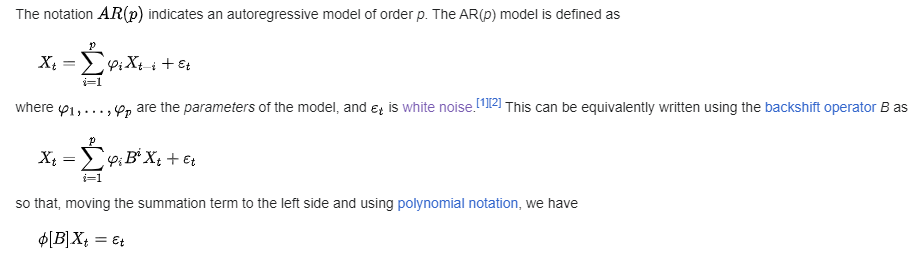

The formula for an autoregressive model with the order of $p$, denoted as AR($p$), is as follows:

$$ X_{t} = \varphi_{1} X_{t-1} + \varphi_{2} X_{t-2} + \cdots + \varphi_{p} X_{t-p} + \varepsilon_{t} $$ 

Where $X_{t}$ is stationary, $\alpha_{1}, \alpha_{2}, \cdots, \alpha_{p}$ are constants and $\varepsilon_{t}$ is normal white noise.  

If we use **backshift operator** $B$, we can rewrite AR($p$) as follows:

$$ \varphi(B) X_{t} = (1 - \varphi_{1} B - \varphi_{2} B^{2} - \cdots - \varphi_{p} B^{p}) X_{t} = \varepsilon_{t} $$

$\varphi[B] = (1 - \varphi_{1} B - \varphi_{2} B^{2} - \cdots - \varphi_{p} B^{p})$ is defined as an **autoregressive operator.**

There are restrictions for the value of coefficients $\alpha$ to make sure $X_{t}$ can stay **stationary**:

> For AR(1), $-1 < \varphi_{1} < 1$.

>For AR(2), 
$ \begin{cases}
  -2 < \varphi_{1} < 2, \\
  -1 < \varphi_{2} < 1, \\
  \varphi_{1} + \varphi_{2} < 1, \\
  \varphi_{2} - \varphi_{1} < 1
\end{cases}$.

For a higher degree of AR, the requirement is as follows:

> 1. Set autoregressive operator = $0$ as follows: $ (1 - \alpha_{1} B - \alpha_{2} B^{2} - \cdots - \alpha_{p} B^{p}) = 0 $. This equation is called a **characteristic equation.**
2. Solve the characteristic equation for $B$ and get all the roots of $B$.
3. The absolute values of all the roots of $B$ need to be $> 1$ to ensure $X_{t}$ is stationary.

We will talk more about these requirements later in this course.

We can see from the AR definition above that random walk is very similar to AR(1) model except that $|\alpha_{1}|=1$. Hence, random walk is not stationary.
<span style='color: transparent; font-size:1%'>All rights reserved WQU WorldQuant University QQQQ</span>

### **2.2 Mean, Variance, ACF, and PACF for AR(1)**

AR(1) model can be written as follows:

$$ X_{t} = c + \varphi_{t} X_{t-1} + \varepsilon_{t} $$

Where $c$ is a constant and $\varepsilon_{t}$ is normal white noise with $\varepsilon_t$ ~ $N(0, \sigma^2)$

Now let's look at AR(1)'s mean, variance, autocovariance, ACF, and PACF.
________________
The **mean** function is:

$$ \mu = \frac{c}{1-\varphi_{1}} $$

When there is no intercept $c$ in the process, $\mu$ is $0$.
________________
The **variance** is:

$$ Var(X_t) = \frac{\sigma^{2}}{1-\varphi^{2}} $$
________________
**Autocovariance** for $X_{t}$ and $ X_{s}$ is:

$$ \gamma(h) = \Big(\frac{\sigma^{2}}{1-\varphi^{2}} \Big) \varphi^{|h|}, \ \text{ where } |h| = |t – s| $$
________________
**Autocorrelation** for $X_{t}$ and $ X_{s}$ is:

$$ \rho(h) =(\varphi^{|h|}), \ \text{ where } |h| = |t – s| $$
________________
**Partial Autocorrelation** for $X_{t}$ and $ X_{s}$ is:

$$ \phi_{hh}= \begin{cases}
  \varphi  &  \text{ for } |h| \le 1 \\
  0  &  \text{ for } |h| > 1
\end{cases} $$

__________________

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima_process import arma_generate_sample

plt.rcParams["figure.figsize"] = (16, 9)  # Figure size and width

# Load datasets
m4_data = pd.read_csv("/home/sscf/wqu_mscfe/Financial Econometrics/M4/M4. goog_eur_10.csv", delimiter="\t")
dxyr_data = pd.read_csv("/home/sscf/wqu_mscfe/Financial Econometrics/M4/M4. dxy_r_data.csv", delimiter="\t")
m4_data = m4_data.loc[:, ["Date", "Year", "GOOGLE", "Volume", "EURUSD", "UST10Y"]]

# Convert date variable to date format
m4_data["Date2"] = pd.to_datetime(m4_data["Date"], format="%m/%d/%Y")
dxyr_data["Date2"] = pd.to_datetime(dxyr_data["Date"], format="%m/%d/%Y")

# Selecting columns and setting index
goog = m4_data.loc[:, ["Date2", "GOOGLE"]].set_index("Date2")
ust10 = m4_data.loc[:, ["Date2", "UST10Y"]].set_index("Date2")
dxy = dxyr_data[["Date2", "DXY_R"]].set_index("Date2")

print(goog.head())
print(ust10.head())
print(dxy.head())

                GOOGLE
Date2                 
2016-01-04  741.840027
2016-01-05  742.580017
2016-01-06  743.619995
2016-01-07  726.390015
2016-01-08  714.469971
            UST10Y
Date2             
2016-01-04   2.245
2016-01-05   2.248
2016-01-06   2.177
2016-01-07   2.153
2016-01-08   2.130
               DXY_R
Date2               
2016-01-05  0.005361
2016-01-06 -0.002213
2016-01-07 -0.009679
2016-01-08  0.003258
2016-01-11  0.001928


### **2.3 AR(1) and AR(2) Examples**

**Figure 1: AR(1) with $\alpha = 0.4$ and AR(1) with $\alpha = -0.4$**


[]

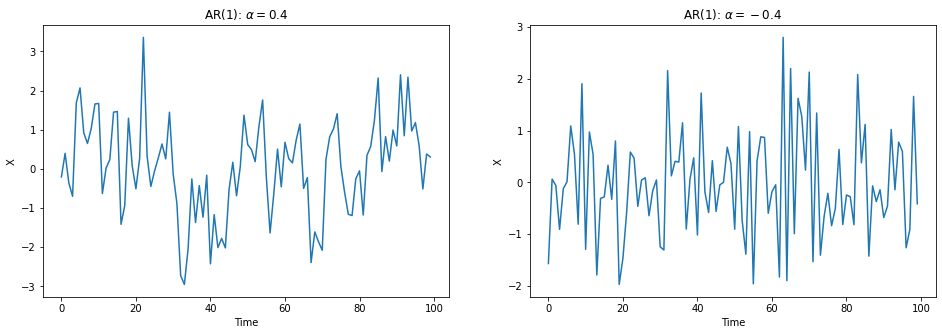

In [7]:
# Simulated AR(1) example with alpha=0.4 and AR(1) example with alpha=-0.4

# generate AR(1) models
np.random.seed(12345)
maparams = np.r_[1, np.array([0.0])]
arparams = np.r_[1, -np.array([0.4])]
arparams_neg = np.r_[1, -np.array([-0.4])]
ar1_p4 = arma_generate_sample(arparams, maparams, 100)  # AR(1): alpha=0.4
ar1_n4 = arma_generate_sample(arparams_neg, maparams, 100)  # AR(1): alpha=-0.4

# Plot
plt.figure(figsize=(16, 5))
ax1 = plt.subplot(121)
plt.plot(ar1_p4)
plt.title("AR(1): $\\alpha=0.4$")
plt.xlabel("Time")
plt.ylabel("X")

ax2 = plt.subplot(122)
ax2.plot(ar1_n4)
plt.title("AR(1): $\\alpha=-0.4$")
plt.xlabel("Time")
plt.ylabel("X")
plt.plot()

Figure 1 gives us two AR(1) graph examples. They both move around the mean = $0$ and within a horizontal band. The AR(1) with negative $\alpha$ is choppier than AR(1) with positive $\alpha$. We know the correlation of two observations next to each other is autocorrelation $\rho(1)$. For AR(1) model, $\rho(1)$ is $\alpha$. <u> Hence, when $\alpha$ is positive, the two observations next to each other move in the same direction while when $\alpha$ is negative, the two observations next to each other move in the opposite direction. That is why we see the plot on the left is smoother than the plot on the right. </u>

**Figure 2: ACF and PACF of AR(1)**

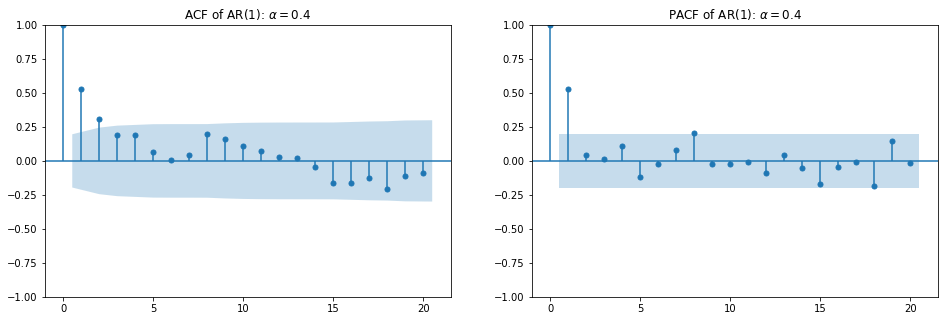

In [8]:
# ACF and PACF of AR(1)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))
sm.graphics.tsa.plot_acf(ar1_p4, title="ACF of AR(1): $\\alpha=0.4$", lags=20, ax=ax1)
sm.graphics.tsa.plot_pacf(ar1_p4, title="PACF of AR(1): $\\alpha=0.4$", lags=20, ax=ax2)
plt.show()

Figure 2 shows the ACF and PACF plots for AR(1) with $\alpha = 0.4$.  From both plots, we see ACF and PACF for lag 1 are all significant and their values are between 0.5 and 0.6. Since the example is simulated data from AR(1) with $\alpha = 0.4$, they are random sample data, and ACF and PACF usually are not exactly the same as 0.4. 

Now, let's try to simulate AR(2) and see its ACF and PACF plots. The following figure 3 shows the graphs for AR(2).


**Figure 3: ACF and PACF of AR(2)**


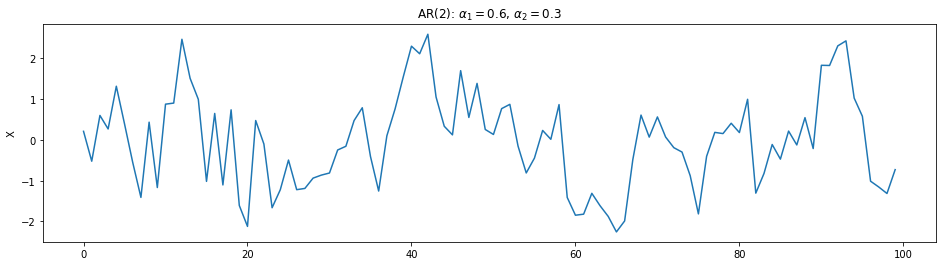

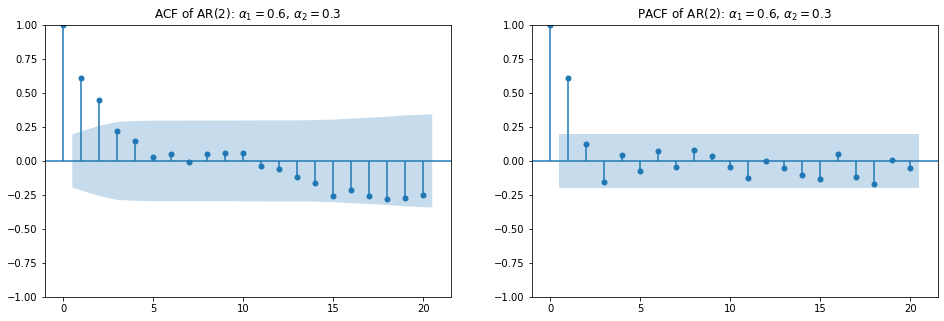

In [9]:
# ACF and PACF of AR(2)

np.random.seed(77777)
arparams1 = np.r_[1, -np.array([0.6, 0.3])]
maparams1 = np.r_[1, np.array([0.0, 0.0])]
ar2 = arma_generate_sample(arparams1, maparams1, 100)

# Plot AR(2)
plt.figure(figsize=(16, 4))
plt.plot(ar2)
plt.title("AR(2): $\\alpha_1=0.6$, $\\alpha_2=0.3$")
plt.ylabel("X")
plt.show()

# plot ACF and PACF
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))
sm.graphics.tsa.plot_acf(
    ar2, title="ACF of AR(2): $\\alpha_1=0.6$, $\\alpha_2=0.3$", lags=20, ax=ax1
)
sm.graphics.tsa.plot_pacf(
    ar2, title="PACF of AR(2): $\\alpha_1=0.6$, $\\alpha_2=0.3$", lags=20, ax=ax2
)
plt.show()

Let's focus on the ACF and PACF plots for AR(2) in figure 3. In the ACF plot, we can see the ACF decreases gradually. On the other hand, the PACF in the plot drops to almost $0$ after lag 2. This interesting PACF behavior for AR(2) process will help us decide what time series model we will use. We will discuss more about model selection later in this module. 


### **2.4 Use AR to represent MA**